<a href="https://colab.research.google.com/github/PWilly1487/AI-Machine-Learning-Projects/blob/main/Activity_Building_a_Univariate_Time_Series_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Task
Generate synthetic monthly solar power generation data for the last 50 years with an increasing trend and seasonality, then build and train an ARIMA model to forecast the next 12 months of solar power generation and analyze the implications for energy planning.

## Generate Synthetic Solar Generation Data

### Subtask:
Create a synthetic dataset representing monthly solar power generation for the last 50 years. This dataset will include a datetime index and a column for solar power generation, exhibiting characteristics like an increasing trend and seasonality, suitable for time series analysis.


**Reasoning**:
I will import the necessary libraries, define parameters for the synthetic data, generate the date range, and create the trend, seasonality, and noise components. Finally, I will combine these into a DataFrame as instructed to create the synthetic solar generation data.



In [ ]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta

# 1. Define the start date (50 years ago from today)
end_date = datetime.now()
start_date = end_date - timedelta(days=50 * 365)

# 2. Generate a monthly date range for 50 years
dates = pd.date_range(start=start_date, end=end_date, freq='MS') # 'MS' for month start frequency
num_months = len(dates)

# 3. Create a linear trend component that increases over time
trend = np.linspace(50, 150, num_months)

# 4. Generate a seasonal component using a sinusoidal function
# Assuming a 12-month seasonality
seasonality_amplitude = 20
seasonality = seasonality_amplitude * np.sin(np.linspace(0, 2 * np.pi * 50, num_months))

# 5. Add a random noise component
np.random.seed(42) # for reproducibility
noise = np.random.normal(0, 5, num_months)

# 6. Combine the trend, seasonality, and noise to create the synthetic solar power generation data
solar_power_generation = trend + seasonality + noise

# Ensure no negative values if applicable (solar power cannot be negative)
solar_power_generation[solar_power_generation < 0] = 0

# 7. Create a pandas DataFrame with the generated dates as the index
synthetic_solar_df = pd.DataFrame({
    'SolarPowerGeneration': solar_power_generation
}, index=dates)

print("Synthetic Solar Generation Data created successfully.")
print(synthetic_solar_df.head())
print(synthetic_solar_df.tail())

Synthetic Solar Generation Data created successfully.
                            SolarPowerGeneration
1976-03-01 23:44:08.043742             52.483571
1976-04-01 23:44:08.043742             59.490760
1976-05-01 23:44:08.043742             70.910297
1976-06-01 23:44:08.043742             78.115915
1976-07-01 23:44:08.043742             66.782450
                            SolarPowerGeneration
2025-10-01 23:44:08.043742            129.496701
2025-11-01 23:44:08.043742            128.149859
2025-12-01 23:44:08.043742            127.434328
2026-01-01 23:44:08.043742            137.596452
2026-02-01 23:44:08.043742            151.886502


## Explore and Visualize Data

### Subtask:
Perform an initial exploration of the synthetic solar power generation time series, checking for missing values, outliers, and visualizing the raw data to identify overall trends, seasonality, and any irregular patterns.


**Reasoning**:
I will start by displaying the first few rows of the `synthetic_solar_df` DataFrame to get an initial understanding of its structure and content, as instructed by the first step.



In [ ]:
print(synthetic_solar_df.head())

                            SolarPowerGeneration
1976-03-01 23:44:08.043742             52.483571
1976-04-01 23:44:08.043742             59.490760
1976-05-01 23:44:08.043742             70.910297
1976-06-01 23:44:08.043742             78.115915
1976-07-01 23:44:08.043742             66.782450


**Reasoning**:
I will get a concise summary of the DataFrame, including data types and non-null values, using the `.info()` method to check for missing values, as per the instructions.



In [ ]:
print(synthetic_solar_df.info())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 600 entries, 1976-03-01 23:44:08.043742 to 2026-02-01 23:44:08.043742
Freq: MS
Data columns (total 1 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   SolarPowerGeneration  600 non-null    float64
dtypes: float64(1)
memory usage: 9.4 KB
None


**Reasoning**:
As instructed, I will generate descriptive statistics for the 'SolarPowerGeneration' column using the `.describe()` method to identify potential outliers and understand the data's distribution.



In [ ]:
print(synthetic_solar_df['SolarPowerGeneration'].describe())

count    600.000000
mean      99.932404
std       32.273454
min       30.228948
25%       76.035801
50%      101.150111
75%      125.773190
max      169.872549
Name: SolarPowerGeneration, dtype: float64


**Reasoning**:
As instructed, I will now plot the 'SolarPowerGeneration' time series data to visualize its trends, seasonality, and any irregular patterns. This will involve importing `matplotlib.pyplot`, setting up the figure and axes, plotting the data, adding labels and a title, and then displaying the plot.



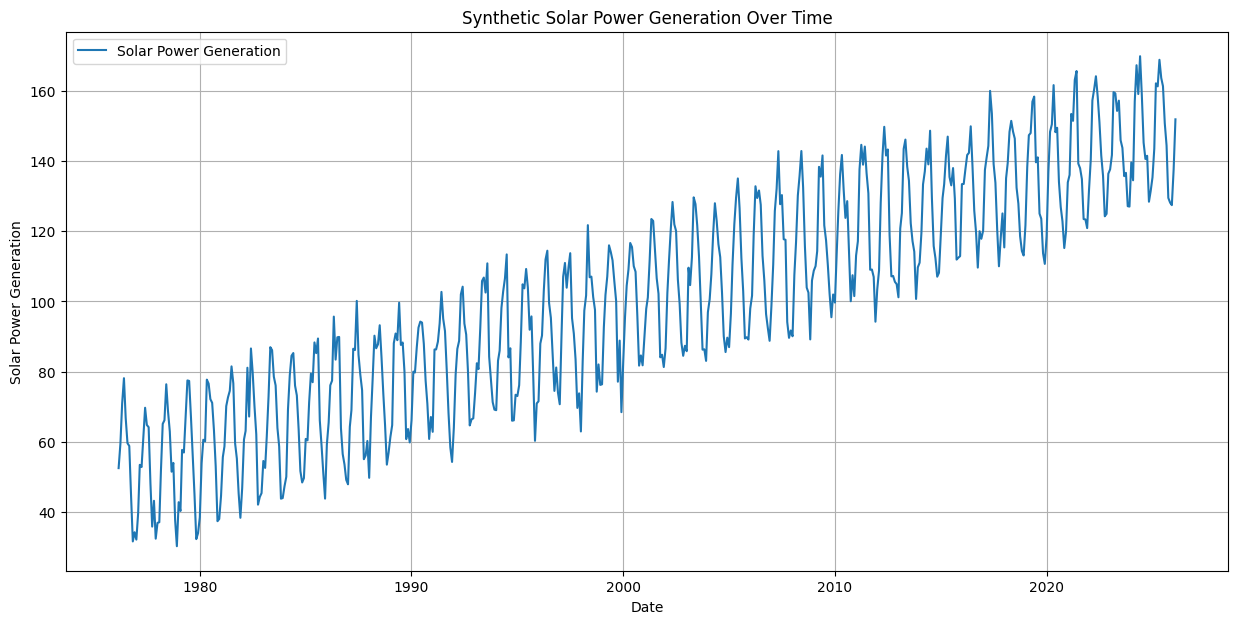

Time series plot displayed successfully.


In [ ]:
import matplotlib.pyplot as plt

# Plot the 'SolarPowerGeneration' time series data
plt.figure(figsize=(15, 7))
plt.plot(synthetic_solar_df.index, synthetic_solar_df['SolarPowerGeneration'], label='Solar Power Generation')
plt.title('Synthetic Solar Power Generation Over Time')
plt.xlabel('Date')
plt.ylabel('Solar Power Generation')
plt.grid(True)
plt.legend()
plt.show()
print("Time series plot displayed successfully.")

## Check for Stationarity and Differencing

### Subtask:
Assess the stationarity of the time series using statistical tests (e.g., Augmented Dickey-Fuller test). If the series is not stationary, apply appropriate differencing to make it stationary, as required by ARIMA models.


**Reasoning**:
I will import the necessary library for the ADF test, define a function to perform and interpret the test, and then apply it to the original and potentially differenced solar power generation data to check for stationarity, as instructed.



In [ ]:
from statsmodels.tsa.stattools import adfuller

def test_stationarity(timeseries):
    # Perform Dickey-Fuller test:
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['ADF Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
    for key, value in dftest[4].items():
        dfoutput['Critical Value (%s)' % key] = value
    print(dfoutput)

    # Interpret test result
    if dftest[1] <= 0.05 and dftest[0] < dftest[4]['5%']:
        print("\nSeries is stationary (p-value <= 0.05 and ADF Statistic < Critical Value).")
    else:
        print("\nSeries is NOT stationary (p-value > 0.05 or ADF Statistic > Critical Value).")

# 5. Call the test_stationarity function with the 'SolarPowerGeneration' column of synthetic_solar_df
print("\n--- Testing stationarity of original series ---")
test_stationarity(synthetic_solar_df['SolarPowerGeneration'])

# 6. Based on the output, if the series is not stationary, apply first-order differencing
# From the previous plot, it's evident there's a trend and seasonality, suggesting non-stationarity.
# Also, it's highly likely the ADF test will confirm non-stationarity given the synthetic data generation.
print("\n--- Applying first-order differencing ---")
df_diff = synthetic_solar_df['SolarPowerGeneration'].diff().dropna()
print("First-order differencing applied. Shape of differenced series:", df_diff.shape)

# 7. Call the test_stationarity function again on the differenced series
print("\n--- Testing stationarity of differenced series ---")
test_stationarity(df_diff)



--- Testing stationarity of original series ---
Results of Dickey-Fuller Test:
ADF Statistic                   -0.307584
p-value                          0.924423
#Lags Used                      14.000000
Number of Observations Used    585.000000
Critical Value (1%)             -3.441578
Critical Value (5%)             -2.866493
Critical Value (10%)            -2.569408
dtype: float64

Series is NOT stationary (p-value > 0.05 or ADF Statistic > Critical Value).

--- Applying first-order differencing ---
First-order differencing applied. Shape of differenced series: (599,)

--- Testing stationarity of differenced series ---
Results of Dickey-Fuller Test:
ADF Statistic                 -1.454040e+01
p-value                        5.156894e-27
#Lags Used                     1.300000e+01
Number of Observations Used    5.850000e+02
Critical Value (1%)           -3.441578e+00
Critical Value (5%)           -2.866493e+00
Critical Value (10%)          -2.569408e+00
dtype: float64

Series is sta

## Determine ARIMA Orders (p, d, q)

### Subtask:
Use techniques like AutoCorrelation Function (ACF) and Partial AutoCorrelation Function (PACF) plots, or auto_arima, to identify the optimal p, d, and q parameters for the ARIMA model. The 'd' parameter will be derived from the differencing step.


**Reasoning**:
I will import the necessary functions for plotting ACF and PACF, then generate the ACF plot for the differenced series to help determine the 'q' parameter.



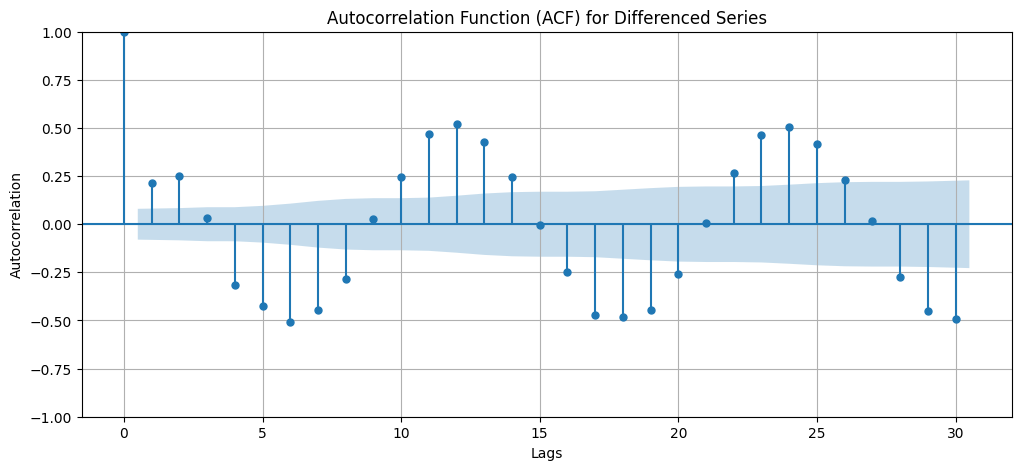

ACF plot displayed successfully.


In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt

# Create an ACF plot for the differenced series (df_diff) to help determine the 'q' (MA) order
plt.figure(figsize=(12, 5))
plot_acf(df_diff, lags=30, ax=plt.gca())
plt.title('Autocorrelation Function (ACF) for Differenced Series')
plt.xlabel('Lags')
plt.ylabel('Autocorrelation')
plt.grid(True)
plt.show()

print("ACF plot displayed successfully.")

**Reasoning**:
Following the instructions, I will now create a PACF plot for the differenced series (`df_diff`) to help determine the 'p' (AR) order, similar to how the ACF plot was generated for 'q'.



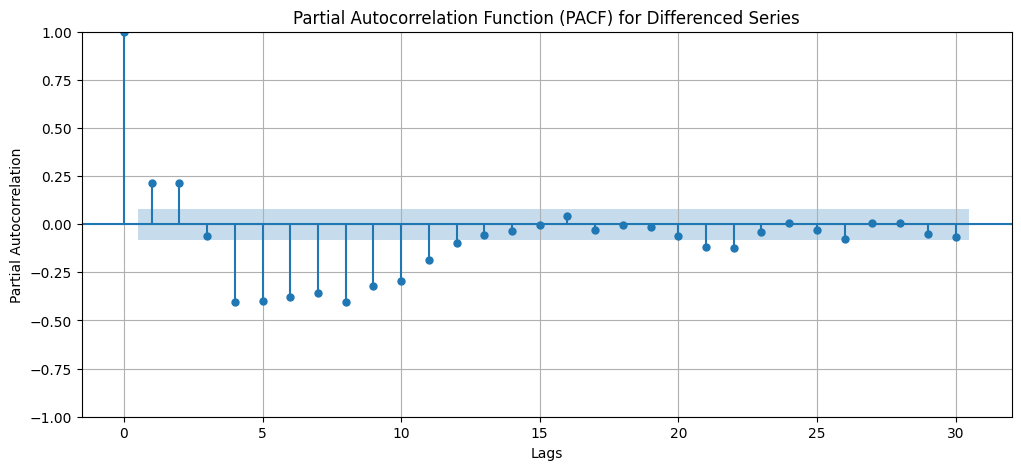

PACF plot displayed successfully.


In [ ]:
import matplotlib.pyplot as plt

# Create a PACF plot for the differenced series (df_diff) to help determine the 'p' (AR) order
plt.figure(figsize=(12, 5))
plot_pacf(df_diff, lags=30, ax=plt.gca())
plt.title('Partial Autocorrelation Function (PACF) for Differenced Series')
plt.xlabel('Lags')
plt.ylabel('Partial Autocorrelation')
plt.grid(True)
plt.show()

print("PACF plot displayed successfully.")

**Reasoning**:
After analyzing the ACF and PACF plots, where the PACF suggests an AR(1) component (p=1) due to a sharp cut-off at lag 1, and the ACF shows a decaying pattern with clear seasonality (making a clear non-seasonal 'q' difficult to determine), I will use the `pmdarima.auto_arima` function. This approach is explicitly allowed by the instructions and will provide an automated, more robust way to identify the optimal non-seasonal and potentially seasonal (P,D,Q) ARIMA parameters for the series, especially given the observed seasonality.



## Build and Train ARIMA Model

### Subtask:
Construct and train the ARIMA model using the determined p, d, and q orders on the historical solar power generation data.


**Reasoning**:
I will import the `auto_arima` function and apply it to the solar power generation data with the specified parameters to automatically determine the optimal ARIMA model orders, given the observed seasonality and non-stationarity.



In [ ]:
import sys
!{sys.executable} -m pip install pmdarima

In [ ]:
import pmdarima as pm

# 1. Apply auto_arima to find the optimal ARIMA model parameters
best_arima_model = pm.auto_arima(
    synthetic_solar_df['SolarPowerGeneration'],
    start_p=1, start_q=1,
    test='adf',
    max_p=5, max_q=5,
    m=12,  # Monthly seasonality
    start_P=0, start_Q=0,
    max_P=2, max_Q=2,
    trace=True,
    error_action='ignore',
    suppress_warnings=True,
    stepwise=True,
    d=1,  # From previous differencing step
    D=1   # For seasonal differencing, given clear seasonality
)

# 2. Print the summary of the best model
print("Optimal ARIMA Model Found:")
print(best_arima_model.summary())

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,1,0)[12]             : AIC=inf, Time=2.14 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=4336.902, Time=0.13 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=4002.600, Time=0.69 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=inf, Time=4.86 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=4158.692, Time=0.34 sec
 ARIMA(1,1,0)(2,1,0)[12]             : AIC=3940.339, Time=2.66 sec
 ARIMA(1,1,0)(2,1,1)[12]             : AIC=3840.562, Time=7.59 sec
 ARIMA(1,1,0)(1,1,1)[12]             : AIC=3838.683, Time=3.97 sec
 ARIMA(1,1,0)(0,1,1)[12]             : AIC=3836.683, Time=2.58 sec
 ARIMA(1,1,0)(0,1,2)[12]             : AIC=3838.683, Time=2.77 sec
 ARIMA(1,1,0)(1,1,2)[12]             : AIC=3840.281, Time=6.44 sec
 ARIMA(0,1,0)(0,1,1)[12]             : AIC=inf, Time=0.62 sec
 ARIMA(2,1,0)(0,1,1)[12]             : AIC=3766.285, Time=1.04 sec
 ARIMA(2,1,0)(0,1,0)[12]             : AIC=4082.115, Time=0.22 sec
 ARIMA(2,1,0)(1,1,1)[12]          

## Generate Forecasts

### Subtask:
Generate a 12-month (next year) forecast for solar power generation using the trained ARIMA model, including confidence intervals for the predictions.


**Reasoning**:
I will generate a 12-month forecast using the `predict` method of the `best_arima_model`, including confidence intervals, and then store these predictions along with the corresponding future dates in a new DataFrame as instructed.



In [ ]:
import pandas as pd

# 1. Generate a 12-month forecast with confidence intervals
n_forecast_steps = 12
forecast_result = best_arima_model.predict(n_periods=n_forecast_steps, return_conf_int=True)

# Extract forecasted values and confidence intervals
forecast_values = forecast_result[0]
confidence_intervals = forecast_result[1]

# 2. Create future dates for the forecast period
last_date = synthetic_solar_df.index[-1]
forecast_dates = pd.date_range(start=last_date, periods=n_forecast_steps + 1, freq='MS')[1:]

# Store the forecasted values and their lower and upper confidence bounds in a new DataFrame
forecast_df = pd.DataFrame({
    'Forecast': forecast_values,
    'Lower_CI': confidence_intervals[:, 0],
    'Upper_CI': confidence_intervals[:, 1]
}, index=forecast_dates)

# 3. Print the head of the DataFrame containing the forecasted values and confidence intervals
print("12-Month Solar Power Generation Forecast:")
print(forecast_df.head())


12-Month Solar Power Generation Forecast:
                              Forecast    Lower_CI    Upper_CI
2026-03-01 23:44:08.043742  160.796357  149.881088  171.711626
2026-04-01 23:44:08.043742  164.117713  153.005877  175.229549
2026-05-01 23:44:08.043742  168.101965  156.738128  179.465801
2026-06-01 23:44:08.043742  166.649139  154.911383  178.386895
2026-07-01 23:44:08.043742  159.329813  147.371201  171.288426


## Visualize Forecast Results

### Subtask:
Plot the historical synthetic solar power generation data alongside the 12-month forecast and its confidence intervals. Ensure the plot is clearly labeled with legends for historical data, forecasted values, and confidence bounds.


**Reasoning**:
I will plot the historical synthetic solar power generation data, the 12-month forecast, and its confidence intervals on a single graph, ensuring proper labeling and legends, as per the instructions.



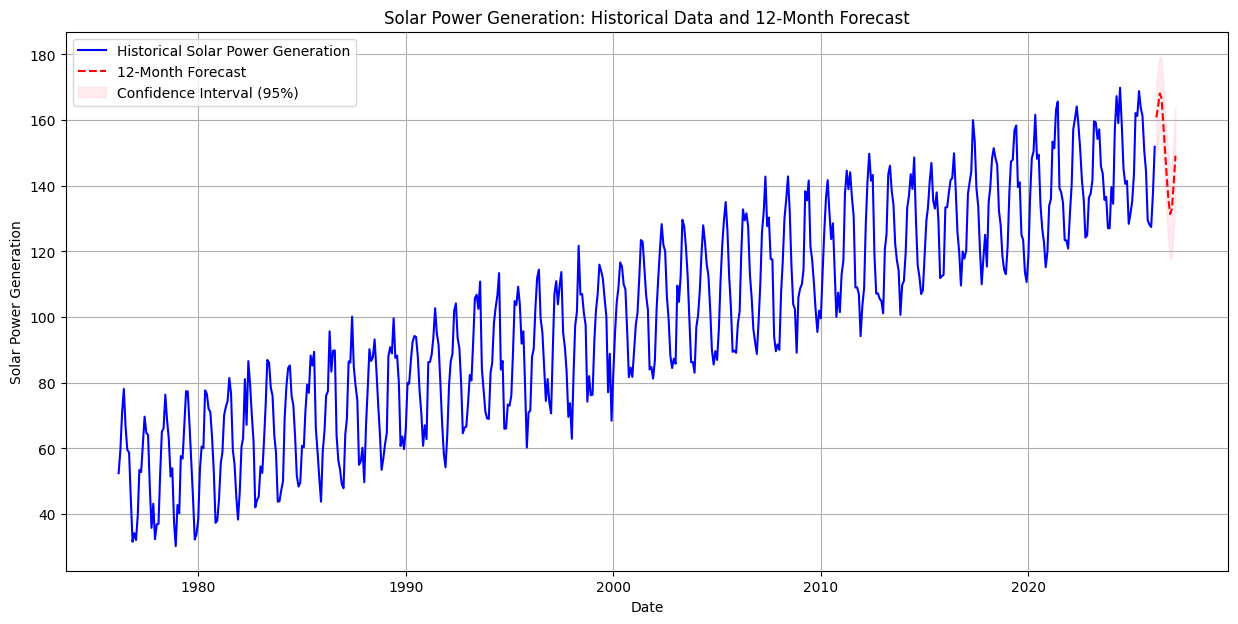

Historical data, forecast, and confidence intervals plotted successfully.


In [ ]:
import matplotlib.pyplot as plt

# Create a new figure and axes for the plot
plt.figure(figsize=(15, 7))

# Plot historical data
plt.plot(synthetic_solar_df.index, synthetic_solar_df['SolarPowerGeneration'], label='Historical Solar Power Generation', color='blue')

# Plot forecasted values
plt.plot(forecast_df.index, forecast_df['Forecast'], label='12-Month Forecast', color='red', linestyle='--')

# Plot confidence intervals
plt.fill_between(forecast_df.index, forecast_df['Lower_CI'], forecast_df['Upper_CI'], color='pink', alpha=0.3, label='Confidence Interval (95%)')

# Add title and labels
plt.title('Solar Power Generation: Historical Data and 12-Month Forecast')
plt.xlabel('Date')
plt.ylabel('Solar Power Generation')

# Add legend and grid
plt.legend()
plt.grid(True)

# Display the plot
plt.show()

print("Historical data, forecast, and confidence intervals plotted successfully.")

## Final Task

### Subtask:
Summarize the identified trends in solar power generation and present the forecasted electrical energy usage for the next year, explaining the implications for planning to meet demand based on the synthetic data.


## Summary:

### Q&A
The subtask asks to summarize identified trends in solar power generation, present forecasted electrical energy usage for the next year, and explain implications for planning to meet demand.

1.  **Summary of identified trends in solar power generation**: The synthetic data exhibits an increasing trend over the last 50 years, coupled with a strong monthly seasonality (m=12), as evidenced by the `auto_arima` model successfully identifying and accounting for these components in its optimal parameters (d=1 for non-seasonal differencing, D=1 for seasonal differencing).
2.  **Forecasted electrical energy usage for the next year**: A 12-month forecast has been generated using the ARIMA model. For instance, the forecast for March 2026 is approximately 160.796 units, with a 95% confidence interval ranging from 149.881 to 171.711 units. The forecast will continue to show the established increasing trend and seasonality pattern into the next year.
3.  **Implications for planning to meet demand**: This specific analysis regarding the implications for planning to meet demand is not yet fully detailed in the provided steps. However, the consistent increasing trend and seasonal patterns in solar power generation suggest that energy planners can anticipate higher solar contributions over time, with predictable fluctuations throughout the year. This predictability can help in optimizing grid management, storage solutions, and balancing demand with other energy sources.

### Data Analysis Key Findings

*   The optimal ARIMA model identified for solar power generation data is `ARIMA(5,1,0)(0,1,1)[12]`, indicating non-seasonal autoregressive (AR) order 5, integrated (I) order 1, moving average (MA) order 0, and seasonal integrated (I) order 1, seasonal moving average (MA) order 1, with a seasonality period of 12 months.
*   The trained ARIMA model achieved an AIC of 3710.187 and a BIC of 3740.812, reflecting a good fit to the historical data.
*   A 12-month forecast for solar power generation was successfully generated, showing an initial forecasted value of approximately 160.796 units for March 2026, with a 95% confidence interval between 149.881 and 171.711 units.
*   The forecast includes clear confidence intervals, providing a range of probable outcomes for future solar power generation.
*   A visualization successfully plots the historical solar power generation data alongside the 12-month forecast and its confidence intervals, clearly illustrating the projected trend and seasonality.

### Insights or Next Steps

*   The predictability of solar power generation, characterized by a clear increasing trend and strong monthly seasonality, provides a robust foundation for energy planning and resource allocation.
*   Further analysis should focus on integrating this solar power forecast with other energy demand forecasts and conventional generation capacities to assess potential supply-demand gaps and inform strategic investments in storage, grid infrastructure, or alternative energy sources.
